In [5]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [6]:
# Load the dataset 
df = pd.read_csv("data3.csv")

In [7]:
df.isna().sum()

year                                  0
govt debt                             0
revenue expenditure                   0
capital expenditure                   0
FDI                                   0
total expenditure                     0
agriculture expenditure              22
rural development expenditure        22
energy expenditure                   22
industry and minerals expenditure    22
transport expenditure                22
internal debt                        10
exchange rate                         0
govt debt in % of GDP                 0
FDI in % of GDP                       0
GDP                                   0
dtype: int64

In [10]:
#Check for outliers and drop/change if needed
#Using zscore for each column
z_scores=stats.zscore(df)
outliers=(z_scores>3).any(axis=1)
outlier_data=df[outliers]
zscore_outlier=z_scores[outliers]
#Check the columns with their zscores
outlier_columns= pd.concat([outlier_data, zscore_outlier.add_suffix('_zscore')], axis=1)
zscore_outlier

,year,govt debt,revenue expenditure,capital expenditure,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,exchange rate,govt debt in % of GDP,FDI in % of GDP,GDP
38,0.737852,0.386075,0.375862,-0.169805,1.530735,0.453015,NaN,NaN,NaN,NaN,NaN,NaN,0.368734,1.097823,3.197565,0.270751
52,1.636106,2.636248,2.781701,3.181732,1.871102,2.587441,NaN,NaN,NaN,NaN,NaN,NaN,1.990188,0.882394,0.736783,2.462172
53,1.700267,3.078205,2.826627,4.715851,2.147760,2.826139,NaN,NaN,NaN,NaN,NaN,NaN,2.015470,1.075345,0.757670,2.775091


In [13]:
outlier_columns

,year,govt debt,revenue expenditure,capital expenditure,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,...,agriculture expenditure_zscore,rural development expenditure_zscore,energy expenditure_zscore,industry and minerals expenditure_zscore,transport expenditure_zscore,internal debt_zscore,exchange rate_zscore,govt debt in % of GDP_zscore,FDI in % of GDP_zscore,GDP_zscore
38,2008,687.506571,140.321372,15.937423,43.446279,203.162,6.78,15.282,34.101,8.973,...,NaN,NaN,NaN,NaN,NaN,NaN,0.368734,1.097823,3.197565,0.270751
52,2022,1896.390000,415.091684,87.396376,49.989286,514.718,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.990188,0.882394,0.736783,2.462172
53,2023,2133.827000,420.222702,120.105711,55.307600,549.560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.015470,1.075345,0.757670,2.775091


In [15]:
#convert INR to USD based on exchange rate
#calculate each column in billions of USD
#create a list of columns to convert 
columns=['revenue expenditure','capital expenditure','total expenditure','agriculture expenditure',
         'rural development expenditure','energy expenditure','industry and minerals expenditure',
         'transport expenditure','internal debt','GDP']
for i in columns:
    df[i]= df[i]/(df['exchange rate']*100)

In [17]:
#check the modified data
df.head(5)

,year,govt debt,revenue expenditure,capital expenditure,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,exchange rate,govt debt in % of GDP,FDI in % of GDP,GDP
0,1970,23.834143,0.004980,0.004652,0.045458,0.009999,NaN,NaN,NaN,NaN,NaN,NaN,7.50,38.183503,0.072826,0.083227
1,1971,25.312157,0.005913,0.003716,0.047659,0.012286,NaN,NaN,NaN,NaN,NaN,NaN,7.49,37.583009,0.070763,0.089920
2,1972,26.552412,0.006841,0.005003,0.017789,0.013639,NaN,NaN,NaN,NaN,NaN,NaN,7.59,37.157028,0.024894,0.094150
3,1973,29.187406,0.007536,0.005428,0.037912,0.013718,NaN,NaN,NaN,NaN,NaN,NaN,7.74,34.129334,0.044331,0.110491
4,1974,28.632653,0.008621,0.006467,0.056972,0.015144,NaN,NaN,NaN,NaN,NaN,NaN,8.10,28.767862,0.057241,0.122877


In [19]:
#Calculate yearly growth rates for revenue, capital and total expenditure
rev_growth=df['revenue expenditure'].pct_change(periods=-1)
cap_growth=df['capital expenditure'].pct_change(periods=-1)
tot_growth=df['total expenditure'].pct_change(periods=-1)

In [21]:
#insert these values into the dataframe
df.insert(loc=2,column='revenue_exp %growth',value=rev_growth*100)
df.insert(loc=4,column='capital_exp %growth',value=cap_growth*100)
df.insert(loc=6,column='total_exp %growth',value=tot_growth*100)

In [23]:
df.head(5)

,year,govt debt,revenue_exp %growth,revenue expenditure,capital_exp %growth,capital expenditure,total_exp %growth,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,exchange rate,govt debt in % of GDP,FDI in % of GDP,GDP
0,1970,23.834143,-15.771858,0.004980,25.188797,0.004652,-18.615504,0.045458,0.009999,NaN,NaN,NaN,NaN,NaN,NaN,7.50,38.183503,0.072826,0.083227
1,1971,25.312157,-13.568798,0.005913,-25.723304,0.003716,-9.922168,0.047659,0.012286,NaN,NaN,NaN,NaN,NaN,NaN,7.49,37.583009,0.070763,0.089920
2,1972,26.552412,-9.221939,0.006841,-7.829014,0.005003,-0.578405,0.017789,0.013639,NaN,NaN,NaN,NaN,NaN,NaN,7.59,37.157028,0.024894,0.094150
3,1973,29.187406,-12.584781,0.007536,-16.067969,0.005428,-9.416642,0.037912,0.013718,NaN,NaN,NaN,NaN,NaN,NaN,7.74,34.129334,0.044331,0.110491
4,1974,28.632653,-18.627262,0.008621,-21.127708,0.006467,-14.087162,0.056972,0.015144,NaN,NaN,NaN,NaN,NaN,NaN,8.10,28.767862,0.057241,0.122877


In [25]:
#Calculate internal debt in % of GDP
df.insert(loc=13,column='internal debt in % of GDP',value=(df['internal debt']/df['GDP'])*100)

In [27]:
df.head(5)

,year,govt debt,revenue_exp %growth,revenue expenditure,capital_exp %growth,capital expenditure,total_exp %growth,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,internal debt in % of GDP,transport expenditure,internal debt,exchange rate,govt debt in % of GDP,FDI in % of GDP,GDP
0,1970,23.834143,-15.771858,0.004980,25.188797,0.004652,-18.615504,0.045458,0.009999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.50,38.183503,0.072826,0.083227
1,1971,25.312157,-13.568798,0.005913,-25.723304,0.003716,-9.922168,0.047659,0.012286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.49,37.583009,0.070763,0.089920
2,1972,26.552412,-9.221939,0.006841,-7.829014,0.005003,-0.578405,0.017789,0.013639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.59,37.157028,0.024894,0.094150
3,1973,29.187406,-12.584781,0.007536,-16.067969,0.005428,-9.416642,0.037912,0.013718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.74,34.129334,0.044331,0.110491
4,1974,28.632653,-18.627262,0.008621,-21.127708,0.006467,-14.087162,0.056972,0.015144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.10,28.767862,0.057241,0.122877


In [29]:
#Round each column(which has floats) to 3 decimal places 
df= df.round(3)

In [33]:
#save the new dataset 
df.to_csv('FDI_DataSet_Modified.csv',index=False)

In [35]:
columns = ['revenue expenditure', 'capital expenditure',
       'total expenditure', 'agriculture expenditure',
       'rural development expenditure', 'energy expenditure',
       'industry and minerals expenditure', 'transport expenditure',
       'internal debt', 'GDP'
       , 'FDI', 'govt debt']

EDA

1.Descrptive statistics

In [38]:
#describe all excpet year column

df_key_variables = df[columns]

df_key_variables

,revenue expenditure,capital expenditure,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,GDP,FDI,govt debt
0,0.005,0.005,0.010,NaN,NaN,NaN,NaN,NaN,NaN,0.083,0.045,23.834
1,0.006,0.004,0.012,NaN,NaN,NaN,NaN,NaN,NaN,0.090,0.048,25.312
2,0.007,0.005,0.014,NaN,NaN,NaN,NaN,NaN,NaN,0.094,0.018,26.552
3,0.008,0.005,0.014,NaN,NaN,NaN,NaN,NaN,NaN,0.110,0.038,29.187
4,0.009,0.006,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.123,0.057,28.633
5,0.011,0.008,0.018,NaN,NaN,NaN,NaN,NaN,NaN,0.118,0.010,28.422
6,0.011,0.007,0.017,NaN,NaN,NaN,NaN,NaN,NaN,0.115,0.008,34.648
7,0.011,0.008,0.020,NaN,NaN,NaN,NaN,NaN,NaN,0.138,0.036,44.802
8,0.013,0.010,0.028,NaN,NaN,NaN,NaN,NaN,NaN,0.167,0.018,50.149
9,0.013,0.008,0.029,NaN,NaN,NaN,NaN,NaN,NaN,0.188,0.049,59.305


2. Time Series Plots

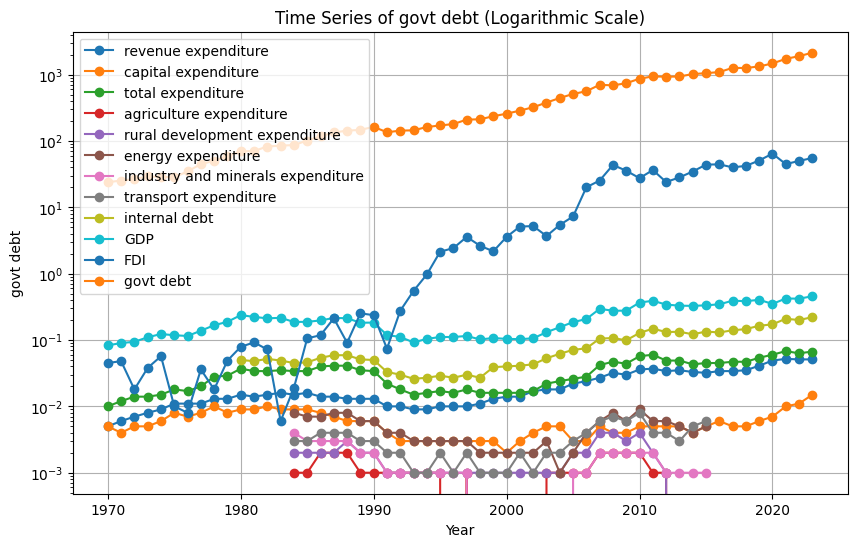

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot time series for each key variable logarithmic
for column in df_key_variables.columns:
    plt.semilogy(df['year'], df[column], marker='o')
    plt.title(f'Time Series of {column} (Logarithmic Scale)')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    # plt.plot(df['year'], df[column], marker='o')
    # plt.title(f'Time Series of {column}')
    # plt.xlabel('Year')
    # plt.ylabel(column)
    # plt.grid(True)
plt.legend(df_key_variables.columns)
plt.show()

3. Correlation Analysis and Heatmap

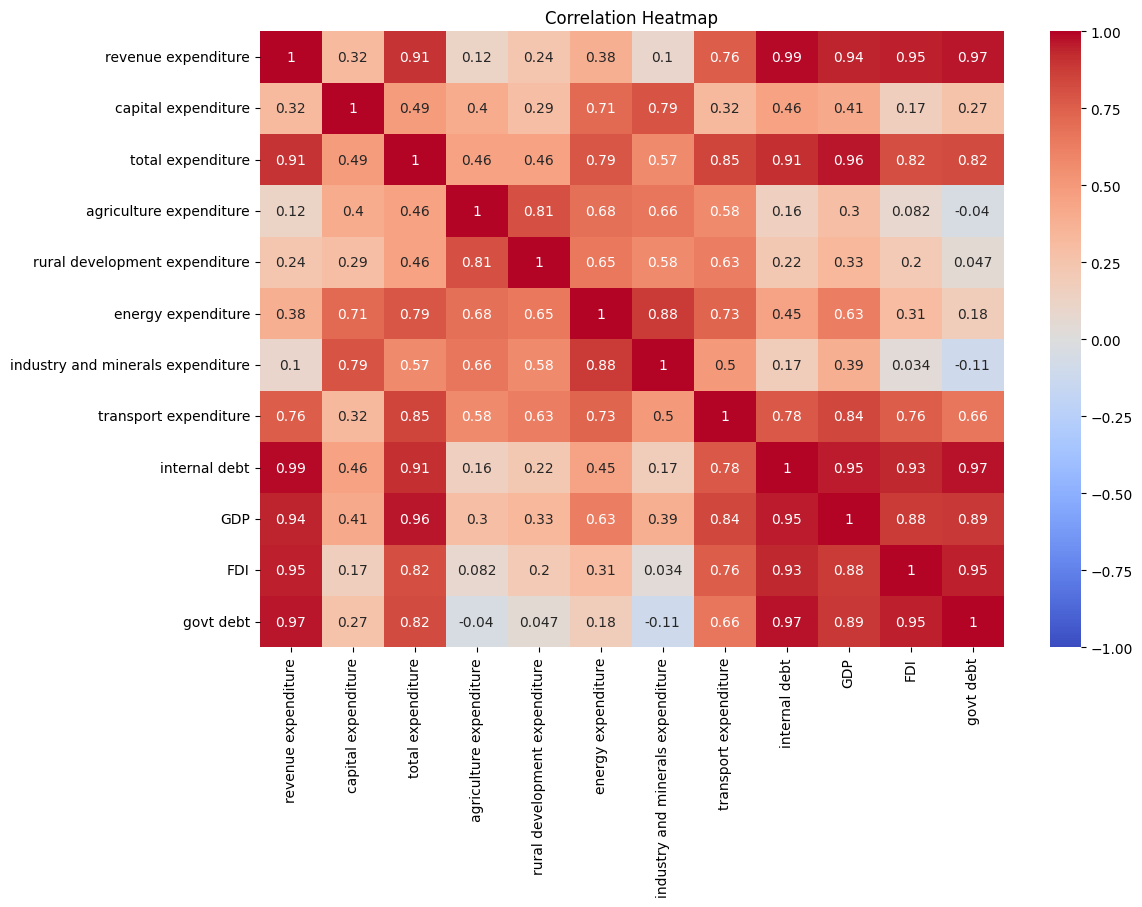

In [43]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_key_variables.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

4. Composition of government expenditure over time

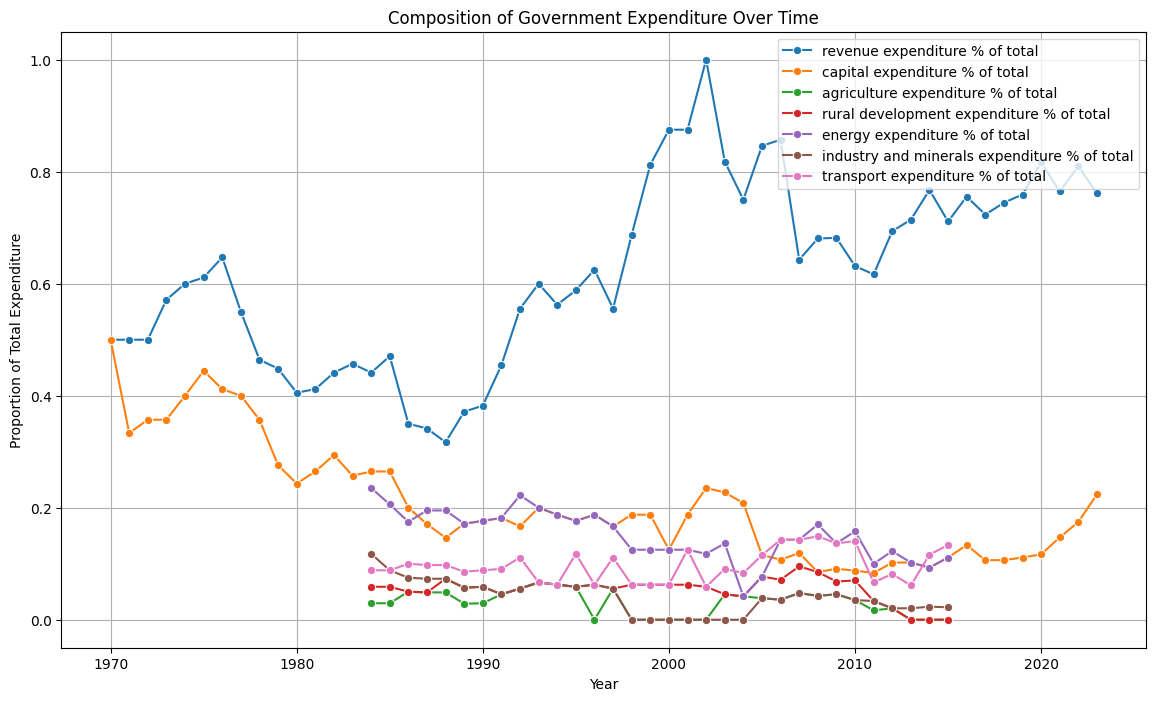

In [45]:
# Calculate the proportion of each expenditure type over total expenditure
expenditure_columns = ['revenue expenditure', 'capital expenditure', 'agriculture expenditure', 
                       'rural development expenditure', 'energy expenditure', 
                       'industry and minerals expenditure', 'transport expenditure']

# Normalize expenditure columns by total expenditure
for column in expenditure_columns:
    df[f'{column} % of total'] = df[column] / df['total expenditure']

# Plot the composition over time
df_plot = df.melt(id_vars=['year'], value_vars=[f'{col} % of total' for col in expenditure_columns],
                  var_name='Expenditure Type', value_name='Proportion')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot, x='year', y='Proportion', hue='Expenditure Type', marker='o')
plt.title('Composition of Government Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Total Expenditure')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


5. Trends in FDI, government debt, and GDP

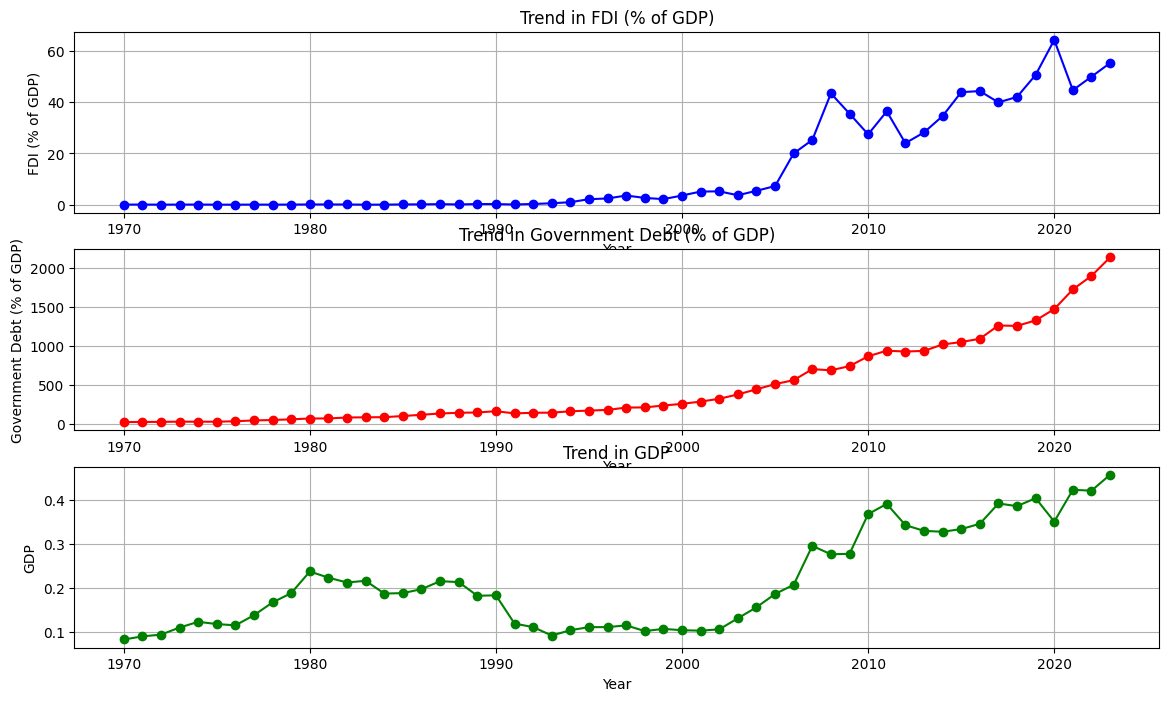

In [47]:
# Plot trends for FDI, government debt, and GDP
plt.figure(figsize=(14, 8))

# FDI trend
plt.subplot(3, 1, 1)
plt.plot(df['year'], df['FDI'], marker='o', color='blue')
plt.title('Trend in FDI (% of GDP)')
plt.xlabel('Year')
plt.ylabel('FDI (% of GDP)')
plt.grid(True)

# Government debt trend
plt.subplot(3, 1, 2)
plt.plot(df['year'], df['govt debt'], marker='o', color='red')
plt.title('Trend in Government Debt (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Government Debt (% of GDP)')
plt.grid(True)

# GDP trend
plt.subplot(3, 1, 3)
plt.plot(df['year'], df['GDP'], marker='o', color='green')
plt.title('Trend in GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)

Stationarity Test

In [49]:
from statsmodels.tsa.stattools import adfuller
# Select the columns you want to test for stationarity
columns_to_test = ['revenue expenditure', 'capital expenditure', 'total expenditure', 'agriculture expenditure', 'rural development expenditure', 'energy expenditure', 'industry and minerals expenditure', 'transport expenditure', 'internal debt', 'govt debt', 'FDI', 'GDP']

# Clean the data by removing rows with missing or infinite values
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

# Perform the ADF test for each column
for col in columns_to_test:
    series = df_clean[col]
    result = adfuller(series)
    print(f"ADF Test for {col}:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print(f"{col} is likely non-stationary.")
    else:
        print(f"{col} is likely stationary.")
    print()

ADF Test for revenue expenditure:
Test Statistic: -2.168845804188713
p-value: 0.21774626002104835
revenue expenditure is likely non-stationary.

ADF Test for capital expenditure:
Test Statistic: -2.0018266615350524
p-value: 0.2857727465518805
capital expenditure is likely non-stationary.

ADF Test for total expenditure:
Test Statistic: -0.8193633055224018
p-value: 0.8133679711093383
total expenditure is likely non-stationary.

ADF Test for agriculture expenditure:
Test Statistic: -2.6201155433554364
p-value: 0.08891065227720701
agriculture expenditure is likely non-stationary.

ADF Test for rural development expenditure:
Test Statistic: -3.413069195737575
p-value: 0.010521330547797202
rural development expenditure is likely stationary.

ADF Test for energy expenditure:
Test Statistic: -2.0459423176240352
p-value: 0.26679913482374673
energy expenditure is likely non-stationary.

ADF Test for industry and minerals expenditure:
Test Statistic: -2.728386699310604
p-value: 0.069253618915100

In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Select the columns you want to test for stationarity
columns_to_test = ['revenue expenditure', 'capital expenditure', 'total expenditure', 'agriculture expenditure', 'rural development expenditure', 'energy expenditure', 'industry and minerals expenditure', 'transport expenditure', 'internal debt', 'govt debt', 'FDI', 'GDP']

# Clean the data by removing rows with missing or infinite values
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

# Perform the ADF test for each column
for col in columns_to_test:
    series = df_clean[col]
    result = adfuller(series)
    print(f"ADF Test for {col}:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print(f"{col} is likely non-stationary.")
    else:
        print(f"{col} is likely stationary.")
    print()

ADF Test for revenue expenditure:
Test Statistic: -2.168845804188713
p-value: 0.21774626002104835
revenue expenditure is likely non-stationary.

ADF Test for capital expenditure:
Test Statistic: -2.0018266615350524
p-value: 0.2857727465518805
capital expenditure is likely non-stationary.

ADF Test for total expenditure:
Test Statistic: -0.8193633055224018
p-value: 0.8133679711093383
total expenditure is likely non-stationary.

ADF Test for agriculture expenditure:
Test Statistic: -2.6201155433554364
p-value: 0.08891065227720701
agriculture expenditure is likely non-stationary.

ADF Test for rural development expenditure:
Test Statistic: -3.413069195737575
p-value: 0.010521330547797202
rural development expenditure is likely stationary.

ADF Test for energy expenditure:
Test Statistic: -2.0459423176240352
p-value: 0.26679913482374673
energy expenditure is likely non-stationary.

ADF Test for industry and minerals expenditure:
Test Statistic: -2.728386699310604
p-value: 0.069253618915100

Cointegration and VECM

In [61]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Load the data
data = df

# Select the variable for y1
y1 = data["FDI"]

# Define the options for y2
y2_options = ["revenue expenditure", "capital expenditure", "GDP", "govt debt"]

for y2_name in y2_options:
    y2 = data[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Perform Johansen cointegration test
    johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

    # Print the Johansen test results
    print(f"Johansen Test Results for FDI and {y2_name}:")
    print("Eigenvalues:", johansen_test.eig)
    print("Trace statistic:", johansen_test.lr1)
    print("Critical values (trace):", johansen_test.cvt)
    print("Max eigenvalue statistic:", johansen_test.lr2)
    print("Critical values (max eigenvalue):", johansen_test.cvm)

    # Extract test results
    trace_stat = johansen_test.lr1
    critical_values_trace = johansen_test.cvt[:, 1]  # Critical values for 5% significance level

    # Determine the cointegration rank
    coint_rank = np.sum(trace_stat > critical_values_trace)

    print("Cointegration Rank:", coint_rank)
    print("")  # empty line for readability

Johansen Test Results for FDI and revenue expenditure:
Eigenvalues: [0.27113329 0.01375455]
Trace statistic: [17.16594978  0.72020107]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [16.44574871  0.72020107]
Critical values (max eigenvalue): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Cointegration Rank: 1

Johansen Test Results for FDI and capital expenditure:
Eigenvalues: [0.12074111 0.01441644]
Trace statistic: [7.44625768 0.75511089]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [6.69114679 0.75511089]
Critical values (max eigenvalue): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Cointegration Rank: 0

Johansen Test Results for FDI and GDP:
Eigenvalues: [0.19657388 0.00296563]
Trace statistic: [11.53568449  0.15444181]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [11.38124268  0.15444

FDI and Revenue Expenditure The test suggests that there are two cointegrating relationships between FDI and Revenue Expenditure. This means that there are two long-run equilibrium relationships between these two variables.

FDI and Capital Expenditure The test suggests that there is one cointegrating relationship between FDI and Capital Expenditure. This means that there is one long-run equilibrium relationship between these two variables.

FDI and GDP The test suggests that there are two cointegrating relationships between FDI and GDP. This means that there are two long-run equilibrium relationships between these two variables.

FDI and Govt Debt The test suggests that there are two cointegrating relationships between FDI and Govt Debt. This means that there are two long-run equilibrium relationships between these two variables.

In [64]:
from statsmodels.tsa.vector_ar.vecm import select_order

# Determine the maximum number of lags to consider
maxlags = 3

# Use the select_order function to find the optimal number of lags
order_selector = select_order(y, maxlags=maxlags, deterministic="ci")

# Extract the optimal lag length based on AIC
optimal_lag = order_selector.aic
print("Optimal lag length based on AIC:", optimal_lag)

Optimal lag length based on AIC: 3


VECM Model

In [67]:
y1 = df['FDI']

# Define the options for y2
y2_options = ["revenue expenditure", "capital expenditure", "GDP", "govt debt"]

for y2_name in y2_options:
    y2 = df[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Estimate the VECM with one cointegrating variable
    vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=1, deterministic="ci")
    results = vecm_model.fit()

    # Print the summary of the VECM estimation
    print(f"VECM Estimation for FDI and {y2_name}:")
    print(results.summary())
    print("")  # empty line for readability
    print("")  # empty line for readability
    print("")  # empty line for readability

VECM Estimation for FDI and revenue expenditure:
Det. terms outside the coint. relation & lagged endog. parameters for equation y1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.1081      0.165     -0.654      0.513      -0.432       0.216
L1.y2        363.9052    364.666      0.998      0.318    -350.828    1078.638
Det. terms outside the coint. relation & lagged endog. parameters for equation y2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1      -8.832e-05   5.72e-05     -1.544      0.123      -0.000    2.38e-05
L1.y2          0.2419      0.126      1.916      0.055      -0.006       0.489
                 Loading coefficients (alpha) for equation y1                 
                 coef    std err          z      P>|z|      [0.025      0.97

This output shows the results of Vector Error Correction Model (VECM) estimation for four different pairs of variables:

FDI (Foreign Direct Investment) and Revenue Expenditure
FDI and Capital Expenditure
FDI and GDP (Gross Domestic Product)
FDI and Govt Debt (Government Debt)

1. FDI and Revenue Expenditure

The loading coefficients (alpha) suggest that FDI responds positively to deviations from the long-run equilibrium, while Revenue Expenditure responds negatively.
The cointegrating relation indicates a positive long-run relationship between FDI and Revenue Expenditure.
2. FDI and Capital Expenditure

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while Capital Expenditure responds positively.
The cointegrating relation indicates a negative long-run relationship between FDI and Capital Expenditure.
3. FDI and GDP

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while GDP responds positively.
The cointegrating relation indicates a positive long-run relationship between FDI and GDP.
4. FDI and Govt Debt

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while Govt Debt responds positively.
The cointegrating relation indicates a negative long-run relationship between FDI and Govt Debt.
Overall, the VECM estimation results suggest that there are significant long-run relationships between FDI and the other variables, and that these relationships are influenced by short-term adjustments to deviations from the long-run equilibrium.

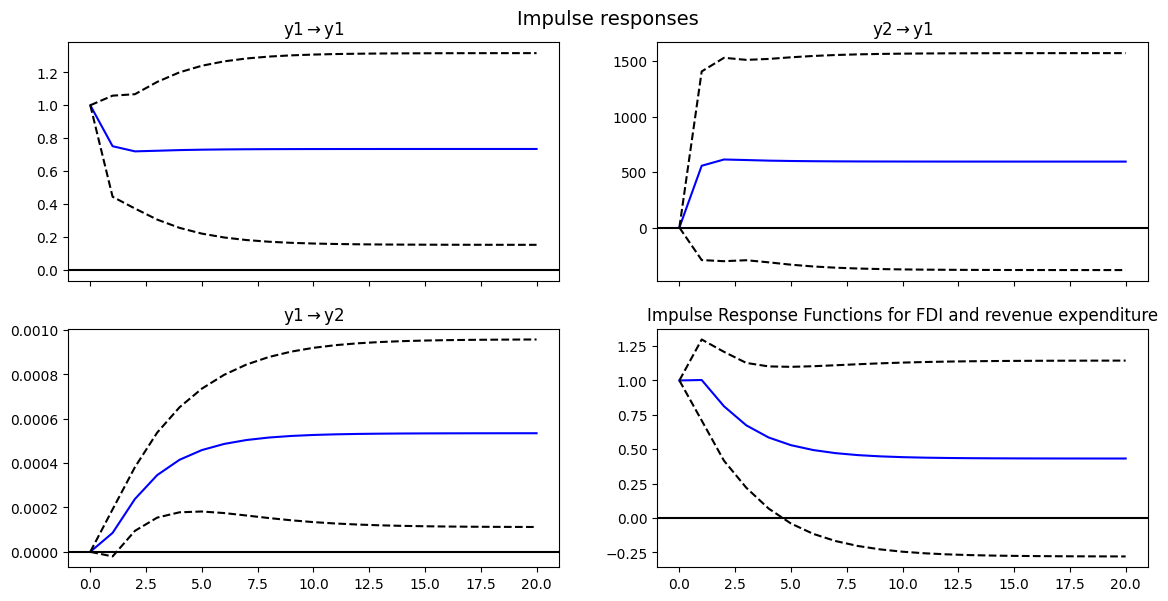

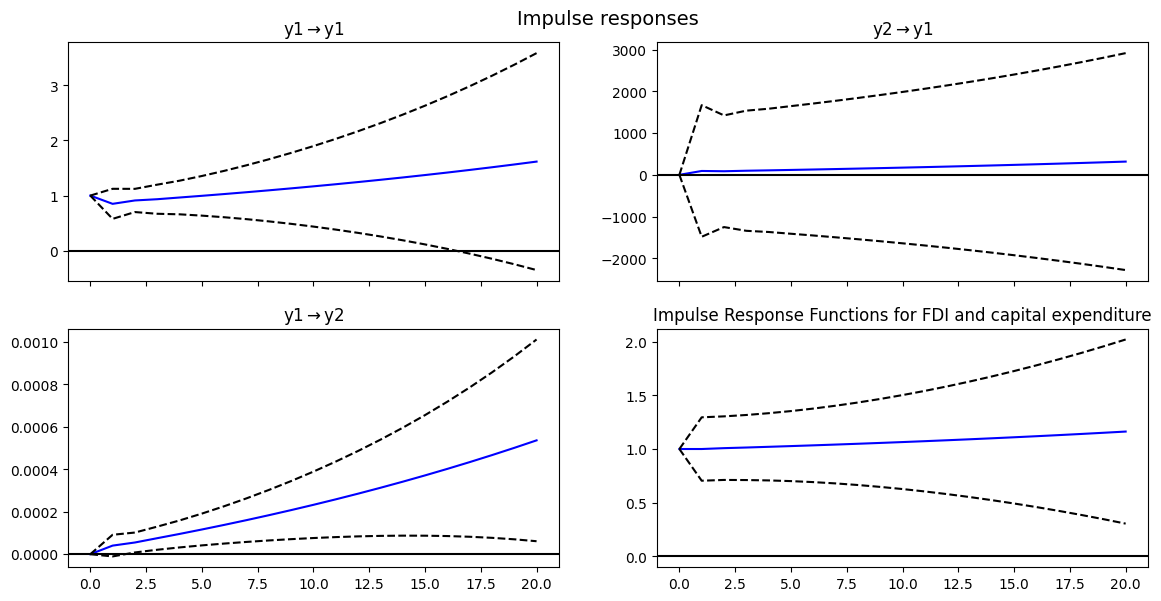

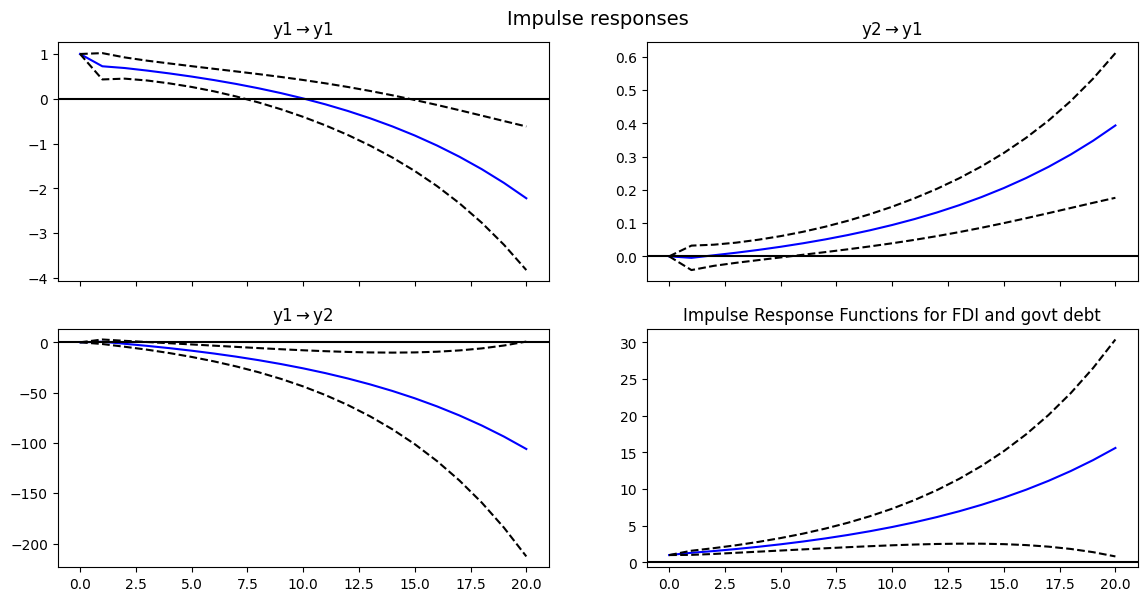

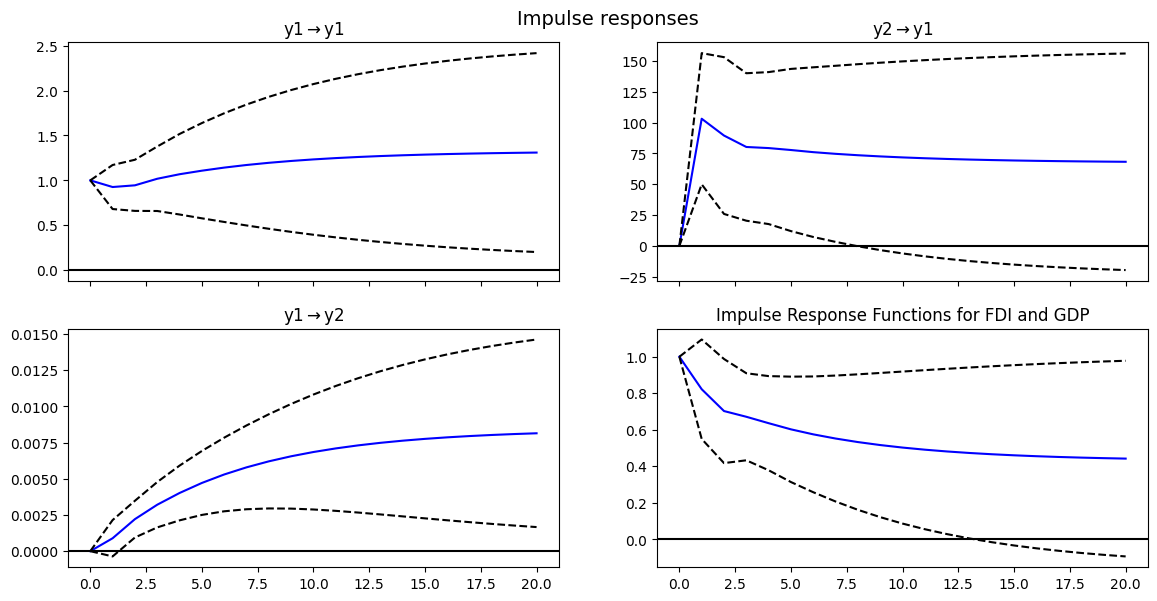

In [71]:
options = ["revenue expenditure", "capital expenditure", "govt debt", "GDP"]

for y2_name in options:
    y1 = df["FDI"]
    y2 = df[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Estimate the VECM with two cointegrating variables
    vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=1, deterministic="ci")
    results = vecm_model.fit()

    # Plot the impulse response functions
    irf = results.irf(periods=20)
    irf.plot(figsize=(12, 6))
    plt.title(f"Impulse Response Functions for FDI and {y2_name}")
    plt.show()
    print("")  # empty line for readability
    print("")  # empty line for readability
    print("")  # empty line for readability

In [74]:

# Select the variables for the Johansen test
y1 = data["FDI"]
y2 = data["govt debt"]
y3 = data["GDP"]

# Create a multivariate time series object
y = np.array([y1, y2, y3]).T

# Perform Johansen cointegration test
johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

# Print the Johansen test results
print("Johansen Test Results:")
print("Eigenvalues:", johansen_test.eig)
print("Trace statistic:", johansen_test.lr1)
print("Critical values (trace):", johansen_test.cvt)
print("Max eigenvalue statistic:", johansen_test.lr2)
print("Critical values (max eigenvalue):", johansen_test.cvm)


Johansen Test Results:
Eigenvalues: [0.47571156 0.23267573 0.07380006]
Trace statistic: [51.33565995 17.75856889  3.98658787]
Critical values (trace): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [33.57709105 13.77198102  3.98658787]
Critical values (max eigenvalue): [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [76]:
from statsmodels.tsa.vector_ar.vecm import select_order

# Determine the maximum number of lags to consider
maxlags = 3

# Use the select_order function to find the optimal number of lags
order_selector = select_order(y, maxlags=maxlags, deterministic="ci")

# Extract the optimal lag length based on AIC
optimal_lag = order_selector.aic
print("Optimal lag length based on AIC:", optimal_lag)


Optimal lag length based on AIC: 3


In [78]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import numpy as np

# Perform Johansen cointegration test
johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

# Extract test results
trace_stat = johansen_test.lr1
critical_values_trace = johansen_test.cvt[:, 1]  # Critical values for 5% significance level

# Determine the cointegration rank
coint_rank = np.sum(trace_stat > critical_values_trace)

print("Cointegration Rank:", coint_rank)


Cointegration Rank: 3


In [82]:

# Select the three variables of interest
y = df[['FDI', 'govt debt', 'GDP']]

# Estimate the VECM with three cointegrating variables
vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=3, deterministic="ci")
results = vecm_model.fit()

# Print the summary of the VECM estimation
print(results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation FDI
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.FDI           0.1973      0.124      1.589      0.112      -0.046       0.441
L1.govt debt    -0.0712      0.022     -3.240      0.001      -0.114      -0.028
L1.GDP         131.6777     27.158      4.849      0.000      78.449     184.906
Det. terms outside the coint. relation & lagged endog. parameters for equation govt debt
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.FDI           0.2474      1.113      0.222      0.824      -1.933       2.428
L1.govt debt     0.2877      0.197      1.461      0.144      -0.098       0.674
L1.GDP        -368.1959    243.306     -1.513      0.130    -845.066     108.674
Det. terms outside

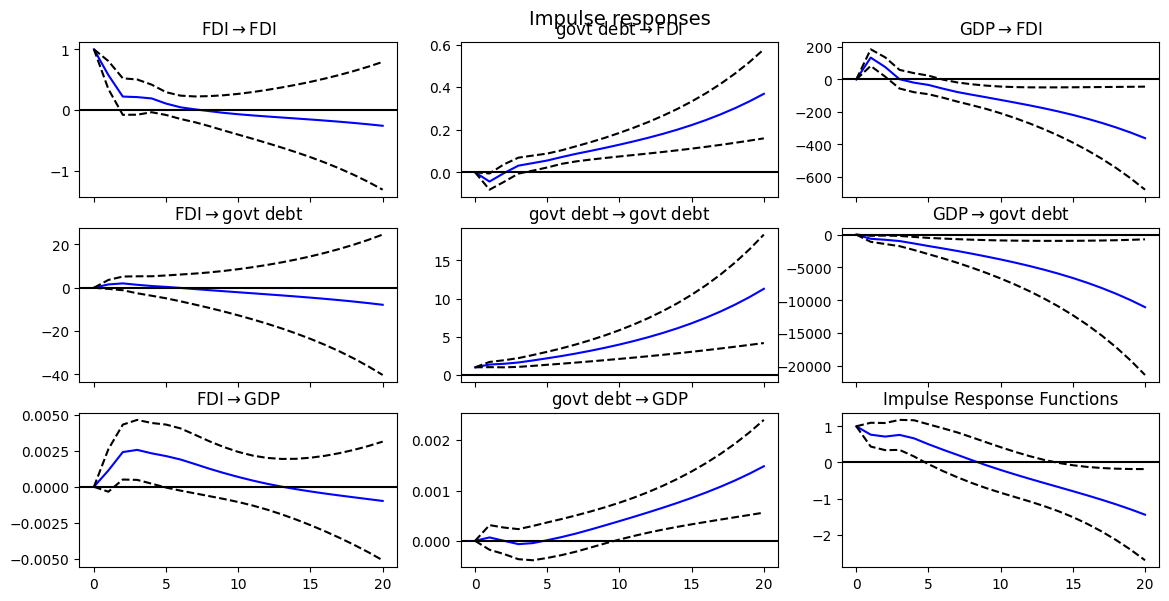

In [84]:
# Select the three variables of interest
y = df[['FDI', 'govt debt', 'GDP']]

# Estimate the VECM with three cointegrating variables
vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=3, deterministic="ci")
results = vecm_model.fit()

# Plot the impulse response functions
irf = results.irf(periods=20)
irf.plot(figsize=(12, 6))
plt.title("Impulse Response Functions")
plt.show()

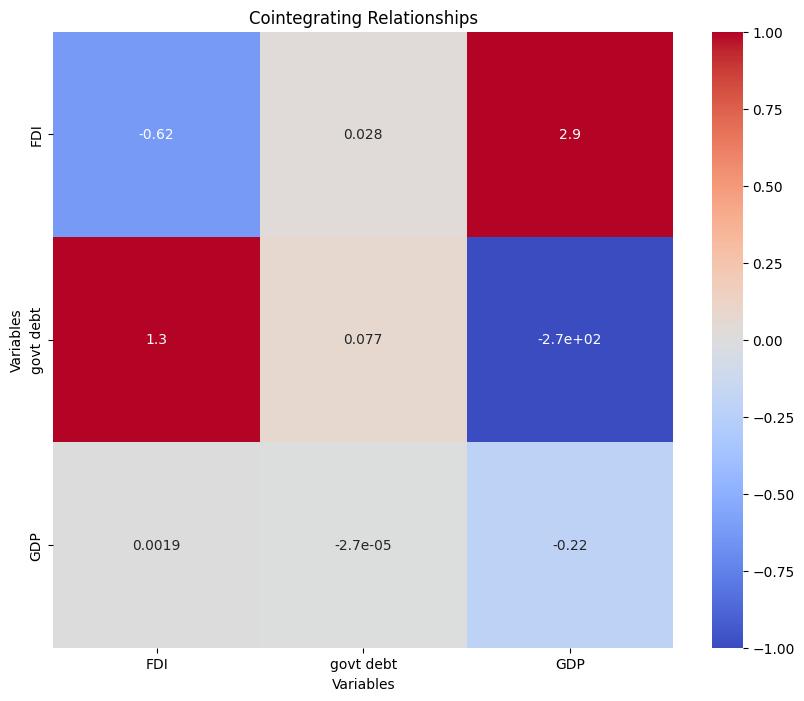

In [86]:
# Extract the alpha and beta matrices
alpha = results.alpha
beta = results.beta

# Compute the cointegrating relationships
coint_rel = np.dot(alpha, beta)

# Create a DataFrame for the cointegrating relationships
coint_rel_df = pd.DataFrame(coint_rel, columns=y.columns, index=y.columns)

# Plot the cointegrating relationships as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coint_rel_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Cointegrating Relationships")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [88]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

In [90]:
# Set the 'year' column as the index
df.set_index('year', inplace=True)

In [92]:
# Define the variables of interest
vars_of_interest = [
    ['FDI', 'capital expenditure'],
    ['FDI', 'revenue expenditure'],
    ['govt debt', 'FDI'],
    ['capital expenditure', 'FDI'],
    ['revenue expenditure', 'FDI'],
    ['capital expenditure', 'FDI'] , ['FDI', 'GDP'], ['GDP','FDI',] ]

In [94]:
# Create a function to perform Granger causality tests
def perform_granger_causality_tests_differenced(df, vars):
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    gc_res = grangercausalitytests(df_differenced, 2)
    return gc_res
def perform_granger_causality_tests(df, vars):
    df_subset = df[vars]
    gc_res = grangercausalitytests(df_subset, 2)
    return gc_res


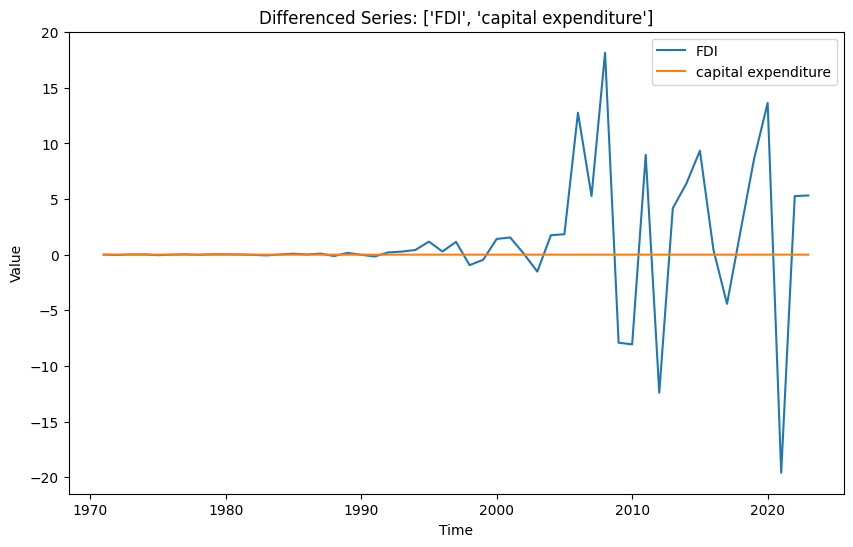

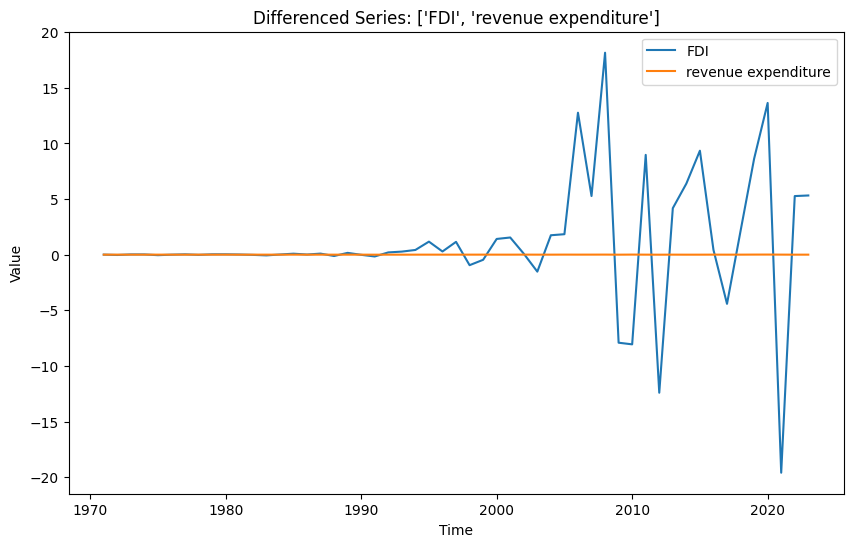

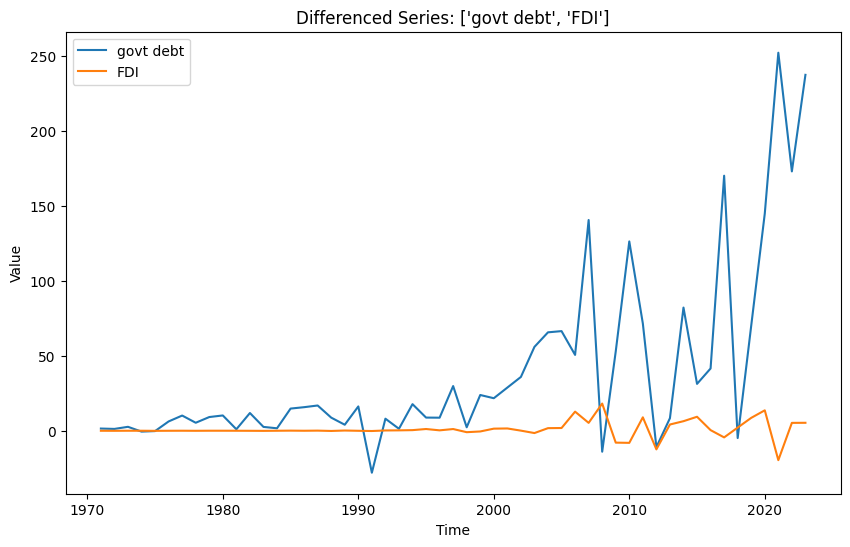

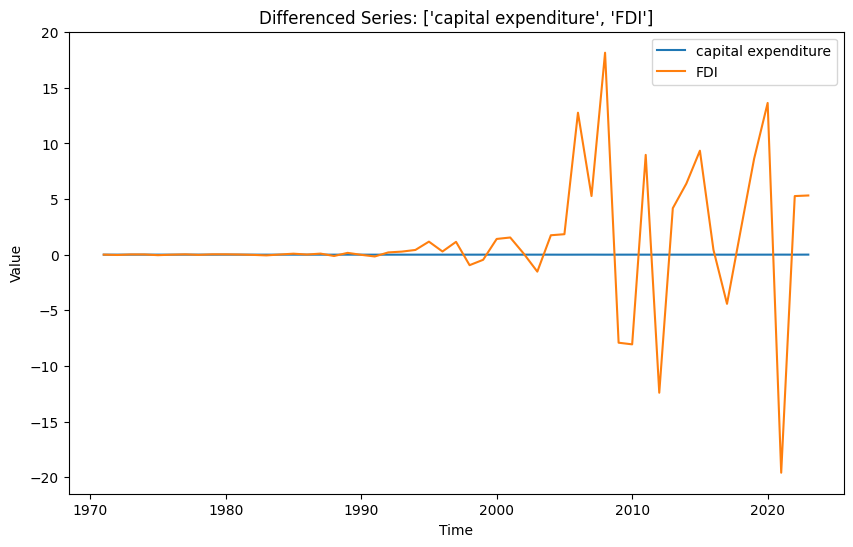

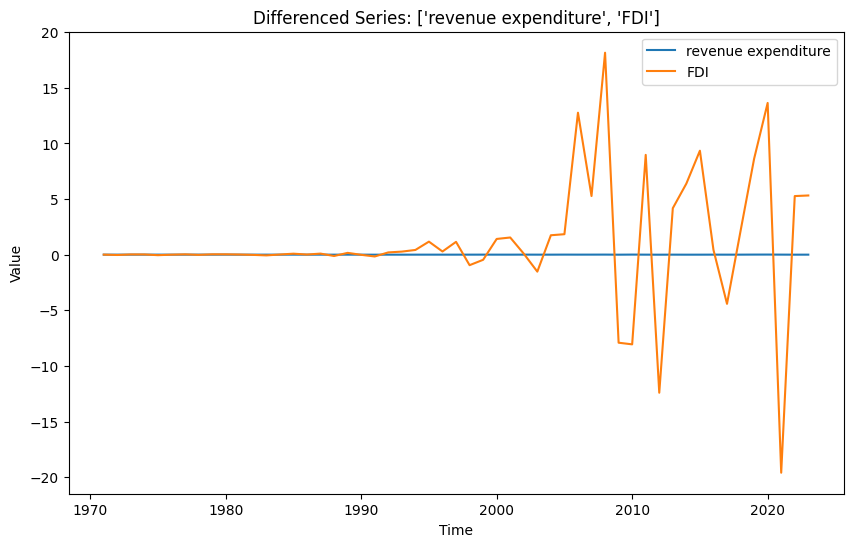

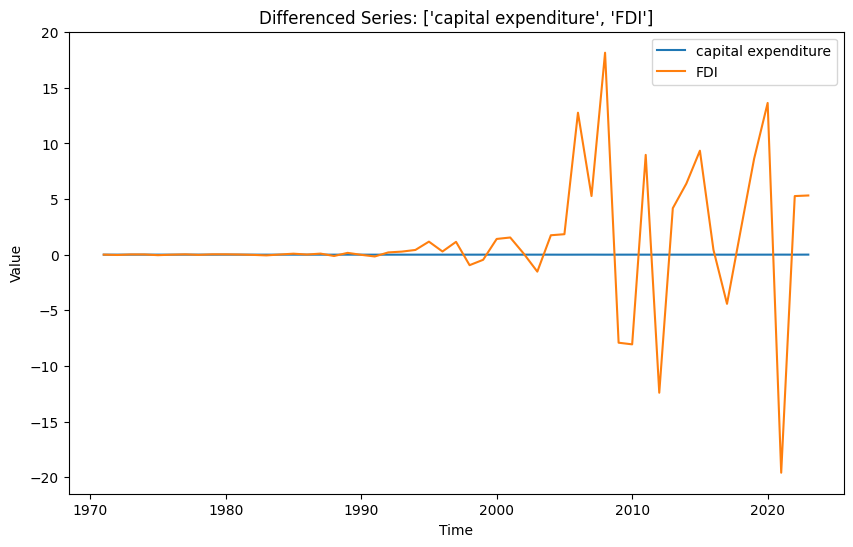

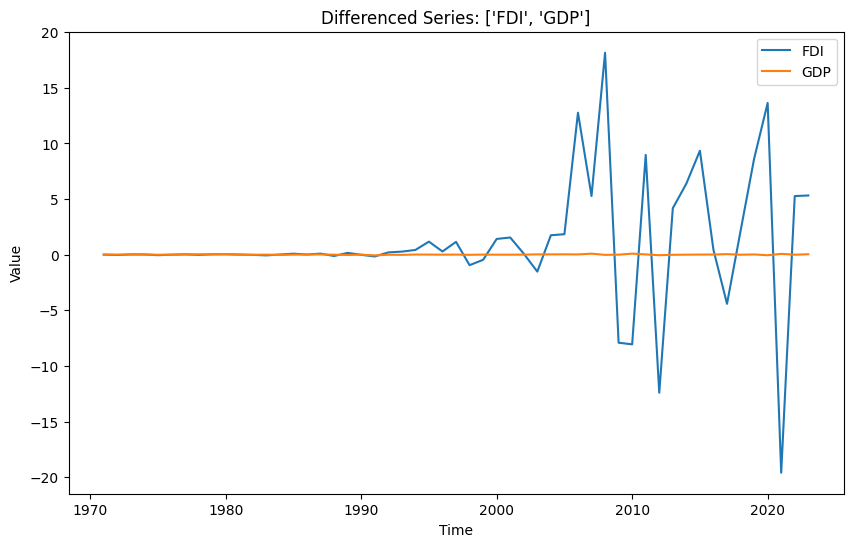

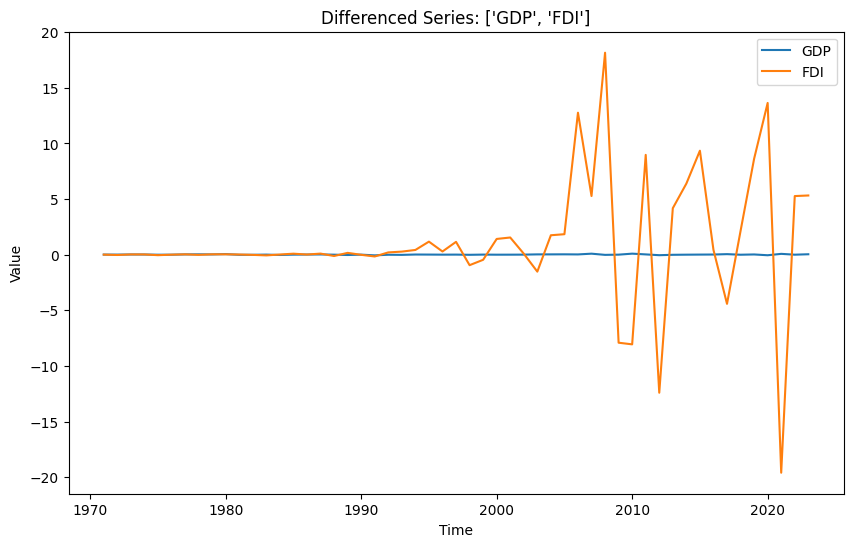

In [96]:
# Plot the differenced series for each set of variables
for vars in vars_of_interest:
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(df_differenced)
    plt.title(f"Differenced Series: {vars}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(vars)
    plt.show()

In [98]:
results_table = []  # Initialize the results table here
for vars in vars_of_interest:
    gc_res = perform_granger_causality_tests(df, vars)
    for lag, res in gc_res.items():
        p_value = res[0]['ssr_ftest'][1]
        if p_value < 0.05:
            granger_causality = 'Yes'
        else:
            granger_causality = 'No'
        results_table.append({
            'Variables': ' -> '.join(vars),
            'Lag': lag,
            'p-value': p_value,
            'Granger Causality': granger_causality
        })

df_results = pd.DataFrame(results_table)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2203  , p=0.6409  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=0.2335  , p=0.6289  , df=1
likelihood ratio test: chi2=0.2330  , p=0.6293  , df=1
parameter F test:         F=0.2203  , p=0.6409  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3473  , p=0.7084  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=0.7685  , p=0.6810  , df=2
likelihood ratio test: chi2=0.7628  , p=0.6829  , df=2
parameter F test:         F=0.3473  , p=0.7084  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9032  , p=0.0314  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=5.1974  , p=0.0226  , df=1
likelihood ratio test: chi2=4.9581  , p=0.0260  , df=1
parameter F test:         F=4.9032  , p=0.0314  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5499  , p=0.2229  , df_d

Granger Causality Test Results

In [102]:
df_results

,Variables,Lag,p-value,Granger Causality
0,FDI -> capital expenditure,1,0.640856,No
1,FDI -> capital expenditure,2,0.708401,No
2,FDI -> revenue expenditure,1,0.031394,Yes
3,FDI -> revenue expenditure,2,0.222930,No
4,govt debt -> FDI,1,0.570160,No
5,govt debt -> FDI,2,0.517777,No
6,capital expenditure -> FDI,1,0.003705,Yes
7,capital expenditure -> FDI,2,0.017956,Yes
8,revenue expenditure -> FDI,1,0.012378,Yes
9,revenue expenditure -> FDI,2,0.028029,Yes


In [105]:
results_table2 = []  # Initialize the results table here
for vars in vars_of_interest:
    gc_res = perform_granger_causality_tests_differenced(df, vars)
    for lag, res in gc_res.items():
        p_value = res[0]['ssr_ftest'][1]
        if p_value < 0.05:
            granger_causality = 'Yes'
        else:
            granger_causality = 'No'
        results_table2.append({
            'Variables': ' -> '.join(vars),
            'Lag': lag,
            'p-value': p_value,
            'Granger Causality': granger_causality
        })

df_results2 = pd.DataFrame(results_table2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0508  , p=0.8225  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.0540  , p=0.8163  , df=1
likelihood ratio test: chi2=0.0539  , p=0.8164  , df=1
parameter F test:         F=0.0508  , p=0.8225  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7665  , p=0.4705  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=1.6996  , p=0.4275  , df=2
likelihood ratio test: chi2=1.6719  , p=0.4335  , df=2
parameter F test:         F=0.7665  , p=0.4705  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1196  , p=0.7309  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.1269  , p=0.7216  , df=1
likelihood ratio test: chi2=0.1268  , p=0.7218  , df=1
parameter F test:         F=0.1196  , p=0.7309  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0078  , p=0.1459  , df_d

Granger Causality After Differencing

In [107]:
df_results2 

,Variables,Lag,p-value,Granger Causality
0,FDI -> capital expenditure,1,0.822532,No
1,FDI -> capital expenditure,2,0.470482,No
2,FDI -> revenue expenditure,1,0.730937,No
3,FDI -> revenue expenditure,2,0.145887,No
4,govt debt -> FDI,1,0.032136,Yes
5,govt debt -> FDI,2,0.176278,No
6,capital expenditure -> FDI,1,0.145564,No
7,capital expenditure -> FDI,2,0.352005,No
8,revenue expenditure -> FDI,1,0.913485,No
9,revenue expenditure -> FDI,2,0.114891,No


Short Run: A positive shock to government debt (i.e., an increase in government debt) has a negative effect on FDI. This means that if government debt suddenly increases, it will likely lead to a decrease in foreign investment in the short term.

Long Run: The negative effect of government debt on FDI fades away over time. This means that as time passes, the initial negative impact of government debt on FDI will decrease and eventually disappear.

In conclusion, an increase in government debt initially discourages foreign investment, but this negative impact diminishes over time, eventually stabilizing and allowing foreign investment to recover.